In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
medical_data = pd.read_csv("insurance.csv")

In [3]:
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
medical_data.shape

(1338, 7)

In [5]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


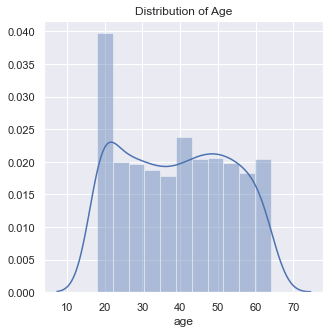

In [8]:
#Distribution of age

sns.set()
plt.figure(figsize=(5,5))
sns.distplot(medical_data["age"])
plt.title("Distribution of Age")
plt.show()

In [9]:
medical_data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

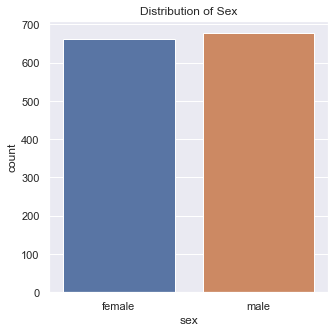

In [10]:
#Countplot of sex

plt.figure(figsize=(5,5))
sns.countplot(data = medical_data, x = "sex")
plt.title("Counts of Sex")
plt.show()

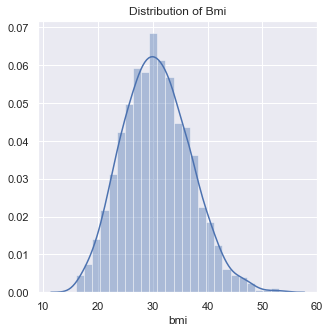

In [11]:
#Distribution of bmi

plt.figure(figsize=(5,5))
sns.distplot(medical_data["bmi"])
plt.title("Distribution of Bmi")
plt.show()

In [12]:
medical_data["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

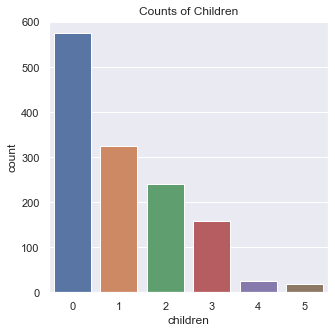

In [13]:
#Countplot of children

plt.figure(figsize=(5,5))
sns.countplot(data = medical_data, x = "children")
plt.title("Counts of Children")
plt.show()

In [14]:
medical_data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

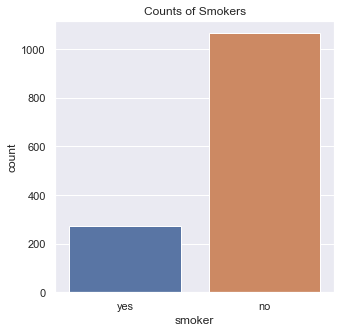

In [15]:
#Countplot of smoker

plt.figure(figsize=(5,5))
sns.countplot(data = medical_data, x = "smoker")
plt.title("Counts of Smokers")
plt.show()

In [16]:
medical_data["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

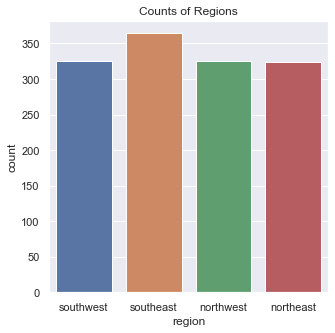

In [17]:
#Countplot of region

plt.figure(figsize=(5,5))
sns.countplot(data = medical_data, x = "region")
plt.title("Counts of Regions")
plt.show()

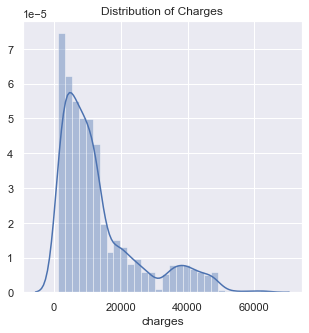

In [18]:
#Distribution of charges

sns.set()
plt.figure(figsize=(5,5))
sns.distplot(medical_data["charges"])
plt.title("Distribution of Charges")
plt.show()

In [19]:
medical_data.replace({"sex": {"male": 0, "female": 1}}, inplace = True)

medical_data.replace({"smoker": {"no": 0, "yes": 1}}, inplace = True)

medical_data.replace({"region": {"southeast": 0, "southwest": 1, "northeast": 2, "northwest": 3}}, inplace = True)

In [20]:
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


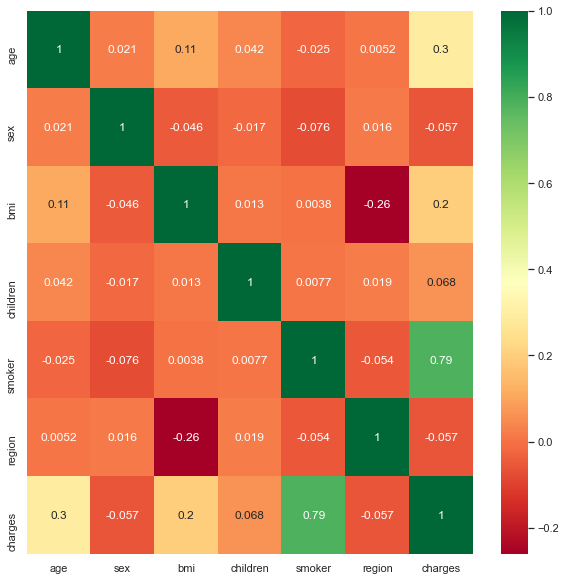

In [21]:
plt.figure(figsize = (10,10))
sns.heatmap(medical_data.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [22]:
X = medical_data.drop(columns = "charges", axis = 1)
Y = medical_data["charges"]

In [23]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [24]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


<b>LinearRegression</b>

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, Y_train)

LinearRegression()

In [29]:
#prediction on training data

training_data_prediction = model.predict(X_train)

In [30]:
#calculation of R Squared Value

r2_train = metrics.r2_score(Y_train, training_data_prediction)

print("R Squared Value: ", r2_train)

R Squared Value:  0.7528965344026


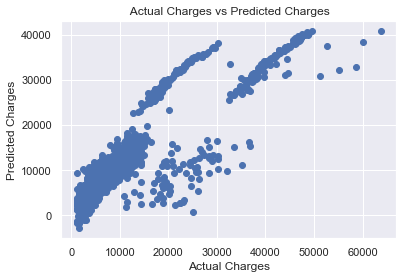

In [31]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title(" Actual Charges vs Predicted Charges")
plt.show()

In [32]:
#prediction on test data

test_data_prediction = model.predict(X_test)

In [33]:
#calculation of R Squared Value

r2_test = metrics.r2_score(Y_test, test_data_prediction)

print("R Squared Value: ", r2_test)

R Squared Value:  0.7398369165415871


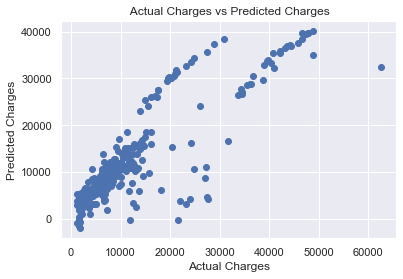

In [34]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title(" Actual Charges vs Predicted Charges")
plt.show()

<b>XGBRegressor</b>

In [35]:
regressor_model = XGBRegressor()

In [36]:
regressor_model.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [37]:
#prediction on training data

training_data_prediction = regressor_model.predict(X_train)

score_1 = metrics.r2_score(Y_train, training_data_prediction)
print("R squared error : ", score_1)

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)
print("Mean Absolute Error : ", score_2)

R squared error :  0.9936446229997591
Mean Absolute Error :  516.7484638120984


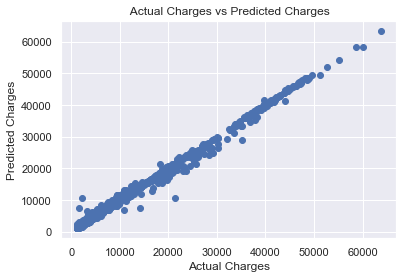

In [38]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title(" Actual Charges vs Predicted Charges")
plt.show()

In [39]:
#prediction on test data

test_data_prediction = regressor_model.predict(X_test)

score_1 = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", score_1)

score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error : ", score_2)

R squared error :  0.8281633348903329
Mean Absolute Error :  2757.8011973918165


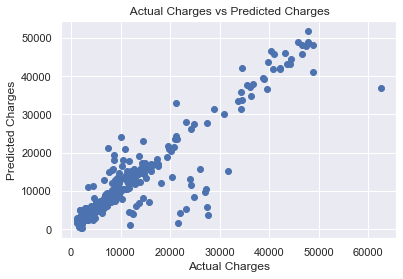

In [40]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title(" Actual Charges vs Predicted Charges")
plt.show()

<b>Lasso</b>

In [41]:
lasso_model = Lasso()

In [42]:
lasso_model.fit(X_train, Y_train)

Lasso()

In [43]:
training_data_prediction = lasso_model.predict(X_train)

r2_train = metrics.r2_score(Y_train, training_data_prediction)

print("R Squared Value: ", r2_train)

R Squared Value:  0.7528964451750321


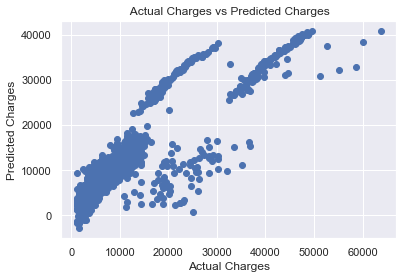

In [44]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title(" Actual Charges vs Predicted Charges")
plt.show()

In [45]:
test_data_prediction = lasso_model.predict(X_test)

r2_test = metrics.r2_score(Y_test, test_data_prediction)

print("R Squared Value: ", r2_test)

R Squared Value:  0.7398488933017395


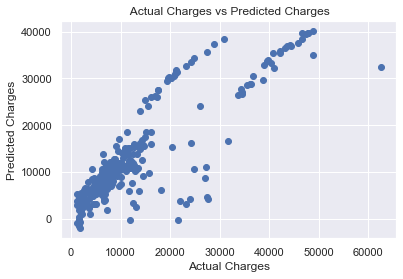

In [46]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title(" Actual Charges vs Predicted Charges")
plt.show()

In [47]:
input_values =(19,1,27.9,0,1,1)

input_values_as_numpy_array = np.asarray(input_values)
input_values_reshaped = input_values_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_values_reshaped)
print(prediction)

print("The Insurance Cost in USD is: ", prediction[0])

[25236.68461814]
The Insurance Cost in USD is:  25236.684618135405


In [48]:
input_values =(19,1,27.9,0,1,1)

input_values_as_numpy_array = np.asarray(input_values)
input_values_reshaped = input_values_as_numpy_array.reshape(1,-1)

prediction = regressor_model.predict(input_values_reshaped)
print(prediction)

print("The Insurance Cost in USD is: ", prediction[0])

[16856.432]
The Insurance Cost in USD is:  16856.432
